#       •	Indian Startup Investment Market Analysis:



## Q1
## Location where startups has received funding maximum number of times

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv('startup_funding.csv')
data = file.copy()

In [4]:
def sep(s):
    return s.split('/')[0].strip()
data.CityLocation.dropna(inplace = True)
cities = data.CityLocation.apply(sep)

In [32]:
cities.replace('Delhi','New Delhi',inplace = True)
cities.replace('bangalore','Bangalore',inplace = True )

CITIES are as follows:
Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91


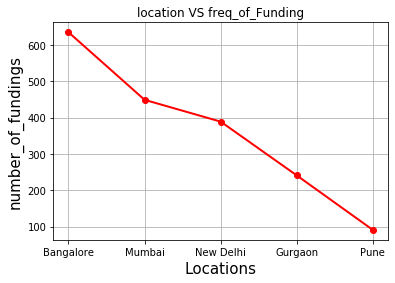

In [34]:
print('CITIES are as follows:')
city_count = cities.value_counts()[0:5]
x = city_count.index
y = city_count.values
for i in range(len(x)):
    print(x[i],y[i])
plt.plot(x,y,color = 'red',marker = 'o',linewidth = 2)
plt.grid()
plt.xlabel('Locations',fontsize = 15)
plt.ylabel('number_of_fundings',fontsize = 15)
plt.title('location VS freq_of_Funding')
plt.show()

# Q2
## TOP INVESTORS :


In [9]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [35]:
len(data[data.InvestorsName ==  'Undisclosed Investors'])

33

In [62]:
data = data[data['InvestorsName']!= 'Undisclosed Investors']
data = data[data['InvestorsName']!= 'Undisclosed investors']

In [63]:
def namesplit(s):
    return s.split(',')
data.InvestorsName.dropna(inplace = True)
investors = data['InvestorsName'].apply(namesplit)

In [64]:
print('Top INVESTORS are as follows:')
x = investors.value_counts()[0:5]
y = x.index
z = x.values
for i in range(len(x)):
    print(*y[i],z[i])

Top INVESTORS are as follows:
Ratan Tata 24
Indian Angel Network 24
Kalaari Capital 16
Group of Angel Investors 15
Sequoia Capital 14


([<matplotlib.patches.Wedge at 0x28617b93b38>,
 [Text(0.8956570175643273, 0.942230601757221, "['Ratan Tata']"),
  Text(-0.9863854981212749, 0.8467842990372724, "['Indian Angel Network']"),
  Text(-0.8811012678926551, -0.6585290849445875, "['Kalaari Capital']"),
  Text(0.1297522657015329, -1.0923206257987255, "['Group of Angel Investors']"),
  Text(0.9792622404028744, -0.5010443738044997, "['Sequoia Capital']")],
 [Text(0.5511735492703551, 0.5798342164659821, '25.81%'),
  Text(-0.6070064603823229, 0.5210980301767829, '25.81%'),
  Text(-0.4806006915778118, -0.35919768269704766, '17.20%'),
  Text(0.07077396310992702, -0.5958112504356683, '16.13%'),
  Text(0.5341430402197496, -0.2732969311660907, '15.05%')])

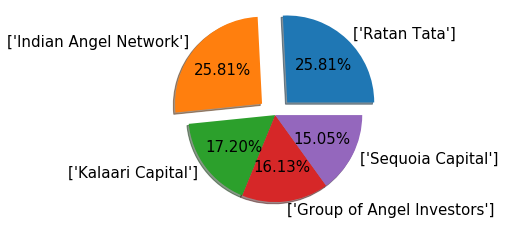

In [80]:
explode = (0.2,0.2,0,0,0)
labels = y
plt.pie(x,autopct = '%.2f%%',explode = explode,labels = labels, shadow = True,textprops={'fontsize': 15})


 if one investor has invested multiple times in one startup, count one for that company

# Q3

# splitting the investors name with startups: counting the name once for each startup: 

In [53]:
file = pd.read_csv('startup_funding.csv')
data = file.copy()

In [54]:
ds=data['StartupName']
in_name =data['InvestorsName']
d={}
i=0
for j in in_name:
    p=str(j)
    q= p.split(",")
    for e in q:
        e = e.strip()
        if e in d:
            d[e]+=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1

In [55]:
for ele in d:
    d[ele]=len(set(d[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in d:
        if ele!="":
            if max<d[ele]:
                max=d[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del d[ct]

In [56]:
print('Top 5 INVESTORS ARE :')
for i in range(5):
    print(investor[i])

Top 5 INVESTORS ARE :
Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


## Q4->top 5 investors who have invested maximum number of times in different companies
if one investor has invested multiple times in one startup, count one for that company.

In [24]:
file = pd.read_csv('startup_funding.csv')
strtup = file.copy()

In [25]:
strtup.replace('Olacabs','Ola',inplace=True)
strtup.replace('Ola Cabs','Ola',inplace=True)
strtup.replace('Flipkart.com','Flipkart',inplace=True) 
strtup.replace('Paytm Marketplace','Paytm',inplace=True)
strtup.replace('Oyo Rooms','Oyo',inplace=True)
strtup.replace('Oyorooms','Oyo',inplace=True)
strtup.replace('OyoRooms','Oyo',inplace=True) 
strtup.replace('OYO Rooms','Oyo',inplace=True)
strtup['InvestmentType'].replace("PrivateEquity","Private Equity",inplace = True)
strtup['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
strtup.InvestmentType.replace('Crowd funding','Crowd Funding',inplace = True)
strtup['InvestmentType'].dropna(inplace = True)
strtup.reset_index(drop=True,inplace=True)
df =strtup[(strtup['InvestmentType']=='Seed Funding') | (strtup['InvestmentType']=='Crowd Funding')]
df.reset_index(drop=True,inplace=True)

ds=df['StartupName']
di=df['InvestorsName']
d={}
i=0
for ele in di:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e = e.strip()
        if e in d:
            d[e]+=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
    
for ele in d:
    d[ele]=len(set(d[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in d:
        if ele!="":
            if max<d[ele]:
                max=d[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del d[ct]

In [26]:
print('Top 5 investors:')
for i in investor:
    print(i)

Top 5 investors:
Indian Angel Network
Undisclosed Investors
Undisclosed investors
Rajan Anandan
LetsVenture


# Q5  
## top 5 investors who have invested in a different number of startups and their investment type is Private Equity

In [57]:
file = pd.read_csv('startup_funding.csv')
strtup = file.copy()

In [58]:
strtup.replace('Olacabs','Ola',inplace=True)
strtup.replace('Ola Cabs','Ola',inplace=True)
strtup.replace('Flipkart.com','Flipkart',inplace=True) 
strtup.replace('Paytm Marketplace','Paytm',inplace=True)
strtup.replace('Oyo Rooms','Oyo',inplace=True)
strtup.replace('Oyorooms','Oyo',inplace=True)
strtup.replace('OyoRooms','Oyo',inplace=True) 
strtup.replace('OYO Rooms','Oyo',inplace=True)
strtup['InvestmentType'].replace("PrivateEquity","Private Equity",inplace = True)
strtup['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
strtup.InvestmentType.replace('Crowd funding','Crowd Funding',inplace = True)
strtup['InvestmentType'].dropna(inplace = True)
strtup.reset_index(drop=True,inplace=True)
df =strtup[(strtup['InvestmentType']=='Private Equity')]
df.reset_index(drop=True,inplace=True)

ds=df['StartupName']
di=df['InvestorsName']
d={}
i=0
for ele in di:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e = e.strip()
        if e in d:
            d[e]+=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
    
for ele in d:
    d[ele]=len(set(d[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in d:
        if ele!="":
            if max<d[ele]:
                max=d[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del d[ct]

In [59]:
print('Top INVESTORS in PRIVATE EQUITY are as follows')
for i in investor:
    print(i)

Top INVESTORS in PRIVATE EQUITY are as follows
Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners
